In [6]:
#Important python libraries are brought

import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#The db dataset is connected to notebook using sqlite3

cnx = sqlite3.connect('Db-IMDB-Assignment.db')

MOVIE TABLE

In [8]:
#Movie Table is imported

df1 = pd.read_sql_query("SELECT * FROM Movie", cnx)
df1.head()

,index,MID,title,year,rating,num_votes
0,0,tt2388771,Mowgli,2018,6.6,21967
1,1,tt5164214,Ocean's Eight,2018,6.2,110861
2,2,tt1365519,Tomb Raider,2018,6.4,142585
3,3,tt0848228,The Avengers,2012,8.1,1137529
4,4,tt8239946,Tumbbad,2018,8.5,7483


In [9]:
#The index column is removed from the table

df1.drop(['index'], axis=1,inplace=True)

In [10]:
#Basic analysis is done on the table .

print('The shape of the Movie table : ',df1.shape)
print('The columns of the Movie table : ',df1.columns)
print('The size of the Movie table : ',df1.size)

The shape of the Movie table :  (3473, 5)
The columns of the Movie table :  Index(['MID', 'title', 'year', 'rating', 'num_votes'], dtype='object')
The size of the Movie table :  17365


In [11]:
#Describe function is used to computes a summary of statistics pertaining to the DataFrame columns.

df1.describe()

,rating,num_votes
count,3473.000000,3.473000e+03
mean,6.037115,4.547316e+03
std,1.402919,2.958851e+04
min,1.300000,5.100000e+01
25%,5.100000,1.200000e+02
50%,6.200000,3.890000e+02
75%,7.100000,1.859000e+03
max,9.600000,1.137529e+06


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MID        3473 non-null   object 
 1   title      3473 non-null   object 
 2   year       3473 non-null   object 
 3   rating     3473 non-null   float64
 4   num_votes  3473 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 135.8+ KB


In [13]:
df1.isna().sum()

MID          0
title        0
year         0
rating       0
num_votes    0
dtype: int64

There's no null values in the table.

In [14]:
#The datatype of the columns are checked.

df1.dtypes

MID           object
title         object
year          object
rating       float64
num_votes      int64
dtype: object

In [15]:
#The duplicates values are checked

df1.drop_duplicates()

,MID,title,year,rating,num_votes
0,tt2388771,Mowgli,2018,6.6,21967
1,tt5164214,Ocean's Eight,2018,6.2,110861
2,tt1365519,Tomb Raider,2018,6.4,142585
3,tt0848228,The Avengers,2012,8.1,1137529
4,tt8239946,Tumbbad,2018,8.5,7483
...,...,...,...,...,...
3468,tt0090611,Allah-Rakha,1986,6.2,96
3469,tt0106270,Anari,1993,4.7,301
3470,tt0852989,Come December,2006,5.7,57
3471,tt0375882,Kala Jigar,1939,3.3,174


In [16]:
df1.nunique()

MID          3473
title        3342
year          125
rating         82
num_votes    1763
dtype: int64

There's no duplicate values in the Movie table.

In [17]:
#The unique values of the year columns are found.
df1['year'].unique()



array(['2018', '2012', '2016', '2017', '2008', 'I 2009', '1977', '2013',
       '2015', '2007', '2002', '1951', '2009', '2014', '2004', '1997',
       '1983', '1994', '2011', '1996', '2001', '2010', '2006', '1971',
       'I 2018', 'XVII 2016', '1958', 'I 2017', '1984', '1987', 'II 2018',
       '2005', 'I 2002', 'III 2016', '2003', '1995', '1998', 'I 2015',
       '1975', '1939', '2000', '1988', 'I 2016', 'I 2006', 'I 2010',
       'I 2013', 'I 2014', 'II 2017', '1991', '1993', '1981', '1989',
       '1976', '1959', '1970', 'VI 2015', '1979', 'I 1964', '1999',
       'I 2003', 'III 2017', 'I 2005', 'I 2008', '1990', '1992', 'I 2007',
       'I 2011', '1957', '1980', '1966', '1967', '1973', 'I 1997', '1968',
       '1969', '1982', 'III 2015', '1978', '1965', '1972', '1956', '1974',
       '1960', '1985', 'II 2012', '1986', '1949', '1964', 'III 2007',
       '1955', 'II 2010', '1961', '1962', 'II 2013', 'I 1986', 'I 1968',
       '1954', 'I 1980', '1941', 'II 2008', 'I 1983', 'V 2015', 

In [18]:
#The values in the year column in unstructured and the datatype is object which needs to be corrected.

df1['year'] = df1['year'].str.split(" ")

In [19]:
year = df1['year'].values

In [20]:
y = []
for i in year:
    if len(i) > 1:
        y.append(i[1])
    else:
        y.append(i[0])

In [21]:
df1['year'] = y

In [22]:
df1['year'].unique()

array(['2018', '2012', '2016', '2017', '2008', '2009', '1977', '2013',
       '2015', '2007', '2002', '1951', '2014', '2004', '1997', '1983',
       '1994', '2011', '1996', '2001', '2010', '2006', '1971', '1958',
       '1984', '1987', '2005', '2003', '1995', '1998', '1975', '1939',
       '2000', '1988', '1991', '1993', '1981', '1989', '1976', '1959',
       '1970', '1979', '1964', '1999', '1990', '1992', '1957', '1980',
       '1966', '1967', '1973', '1968', '1969', '1982', '1978', '1965',
       '1972', '1956', '1974', '1960', '1985', '1986', '1949', '1955',
       '1961', '1962', '1954', '1941', '1963', '1931', '1953', '1948',
       '1952', '1947', '1936', '1946', '1943', '1950'], dtype=object)

In [23]:
df1['year'] = pd.to_datetime(df1['year'])

In [24]:
df1.dtypes

MID                  object
title                object
year         datetime64[ns]
rating              float64
num_votes             int64
dtype: object

In [25]:
#The dataset is sorted to find the top 10 movies with most number of 'num_votes'

df1.sort_values(by=['num_votes'],ascending=False).head(10)

,MID,title,year,rating,num_votes
3,tt0848228,The Avengers,2012-01-01,8.1,1137529
11,tt1010048,Slumdog Millionaire,2008-01-01,8.0,729879
6,tt3498820,Captain America: Civil War,2016-01-01,7.8,536641
16,tt0454876,Life of Pi,2012-01-01,7.9,518138
12,tt1190080,2012,2009-01-01,5.8,320472
33,tt1187043,3 Idiots,2009-01-01,8.4,287848
17,tt1606378,A Good Day to Die Hard,2013-01-01,5.3,184585
8,tt3741834,Lion,2016-01-01,8.1,170216
32,tt0366551,Harold & Kumar Go to White Castle,2004-01-01,7.1,169683
14,tt0075860,Close Encounters of the Third Kind,1977-01-01,7.7,163278


In [26]:
#The dataset is sorted to find the top 10 movies with most 'rating'

df1.sort_values(by=['rating'],ascending=False).head(10)

,MID,title,year,rating,num_votes
3349,tt4946222,Man on Mission Fauladi,2004-01-01,9.6,96
3409,tt2963042,Mahakali Ka Insaaf,2001-01-01,9.6,60
3459,tt4944394,Man on Mission Taqatwar,2005-01-01,9.5,58
2881,tt4332782,Main Hoon Khiladiyon Ka Khiladi,2004-01-01,9.4,61
3458,tt3445640,Military Officer,1998-01-01,9.4,61
1733,tt5963908,T for Taj Mahal,2018-01-01,9.3,71
3248,tt3030720,Dilwale:The Brave Heart,2001-01-01,9.3,83
2136,tt6545212,Leera the Soulmate,2018-01-01,9.2,789
2887,tt0249795,Maya Bazaar,1957-01-01,9.2,3013
3255,tt7496256,Gospel Movie: Who Is My Lord,2017-01-01,9.1,81


Univariate Analysis 

In [27]:
df1['rating'] = df1['rating'].sort_values()

<Axes: xlabel='rating', ylabel='Count'>

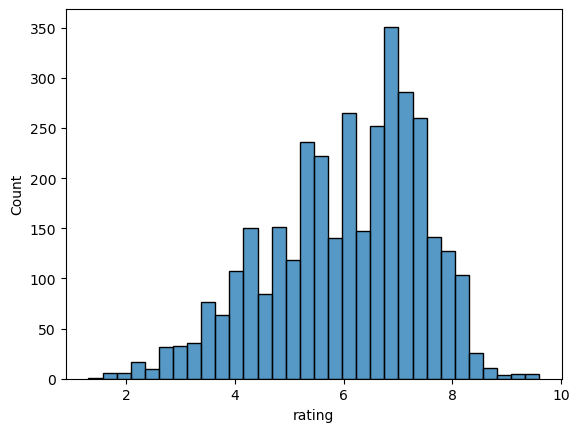

In [28]:
sns.histplot(data=df1, x='rating')

From the above histogram it is clear that most of the rating fall under 6-8. 

In [29]:
df1['year'] = df1['year'].sort_values()

<Axes: xlabel='year', ylabel='Count'>

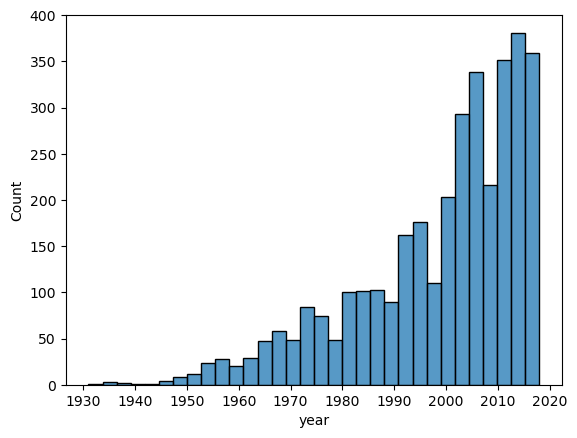

In [30]:
sns.histplot(data=df1,x='year')

From the above histogram it is clear that there's an increase in number of movies in recent years.

Bivariate Analysis 

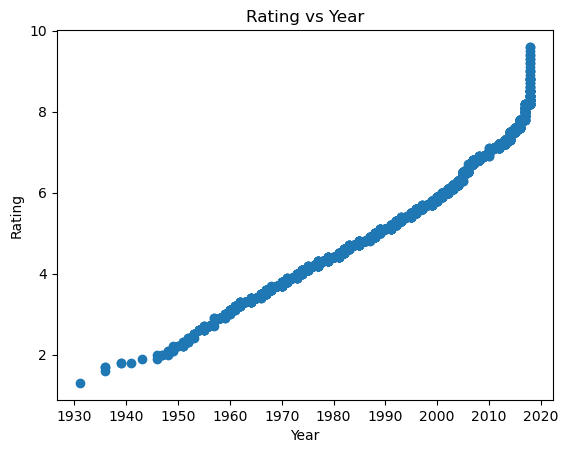

In [31]:
a = df1['year'].sort_values()
b = df1['rating'].sort_values()
plt.title('Rating vs Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.scatter(a,b)

From the above scatter plot it is clear that there's an increase in the number of rating in recent years

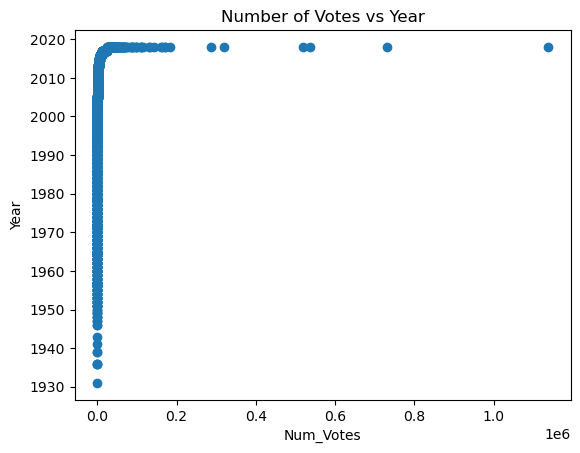

In [32]:
c = df1['num_votes'].sort_values()
d = df1['year'].sort_values()
plt.title('Number of Votes vs Year')
plt.xlabel('Num_Votes')
plt.ylabel('Year')
plt.scatter(c,d)

From the above histogram it is clear that the number of votes has increased in last 10 years ie. between 2010 to 2020.

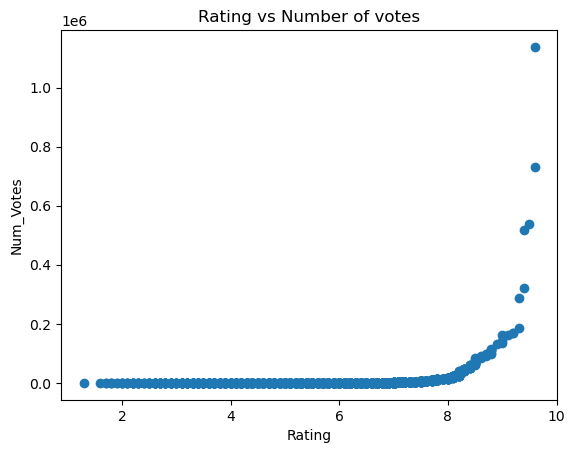

In [33]:
e = df1['rating'].sort_values()
f = df1['num_votes'].sort_values()
plt.title('Rating vs Number of votes')
plt.xlabel('Rating')
plt.ylabel('Num_Votes')
plt.scatter(e,f)

From the above graph it is clear that upto rating 8 there's no much difference between Num_Votes and Rating , but after 8 there's a difference.

Text(0.5, 1.0, 'year wise contents')

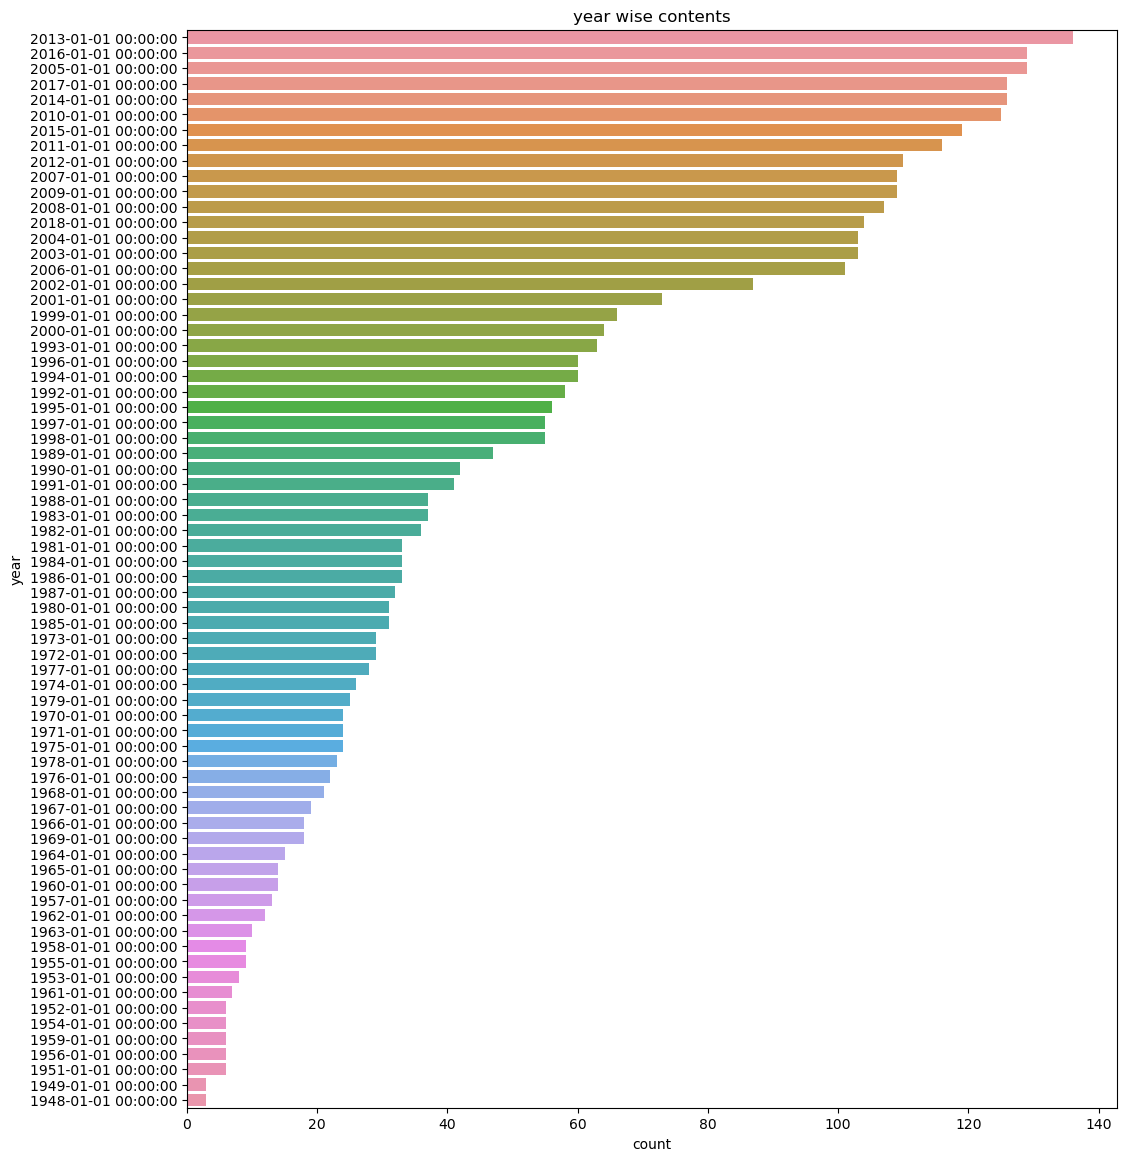

In [34]:
plt.figure(figsize=(12,14))
sns.countplot(data=df1,
              y="year",
             order=df1["year"].value_counts().index[0:70])
plt.title("year wise contents")

PERSON TABLE

In [35]:
df2 = pd.read_sql_query("SELECT * FROM Person", cnx)
df2.head()

,index,PID,Name,Gender
0,0,nm0000288,Christian Bale,Male
1,1,nm0000949,Cate Blanchett,Female
2,2,nm1212722,Benedict Cumberbatch,Male
3,3,nm0365140,Naomie Harris,Female
4,4,nm0785227,Andy Serkis,Male


In [36]:
#The index column is removed from the table

df2.drop(['index'], axis=1,inplace=True)

In [37]:
#Basic analysis is done on the table .

print('The shape of the Person table : ',df2.shape)
print('The columns of the Person table : ',df2.columns)
print('The size of the Person table : ',df2.size)

The shape of the Person table :  (37566, 3)
The columns of the Person table :  Index(['PID', 'Name', 'Gender'], dtype='object')
The size of the Person table :  112698


In [38]:
df2.describe()

,PID,Name,Gender
count,37565,37565,29341
unique,37565,35599,2
top,nm0000288,Rajesh,Male
freq,1,12,19925


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37566 entries, 0 to 37565
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PID     37565 non-null  object
 1   Name    37565 non-null  object
 2   Gender  29341 non-null  object
dtypes: object(3)
memory usage: 880.6+ KB


In [40]:
df2.nunique()

PID       37565
Name      35599
Gender        2
dtype: int64

In [41]:
df2.isna().sum()

PID          1
Name         1
Gender    8225
dtype: int64

There are null values in the table.

In [42]:
df2.drop_duplicates()

,PID,Name,Gender
0,nm0000288,Christian Bale,Male
1,nm0000949,Cate Blanchett,Female
2,nm1212722,Benedict Cumberbatch,Male
3,nm0365140,Naomie Harris,Female
4,nm0785227,Andy Serkis,Male
...,...,...,...
37561,nm2182643,Kamika Verma,None
37562,nm1029114,Dhorairaj Bhagavan,None
37563,nm3769883,Nasir Shaikh,None
37564,nm1470989,Kannan,None


There are no duplicate values.

In [43]:
df2['Gender'].replace({None : 'Unavailable'},inplace=True)

In [44]:
df2.dropna(inplace=True)

In [45]:
df2.isna().sum()

PID       0
Name      0
Gender    0
dtype: int64

All the null values are filled.

In [46]:
df2['Name'].value_counts().head(10)

 Rajesh          12
 Rahul           11
 Imran Khan      10
 Deepak           9
 Sanjay           8
 Raju             8
 Shyam            7
 Rekha            7
 Madhu            7
 Manoj Sharma     7
Name: Name, dtype: int64

Top 10 People with most number of movies are shown above.

GENRE TABLE

In [47]:
df3 = pd.read_sql_query('select * from Genre',cnx)
df3.head()

,index,Name,GID
0,0,"Adventure, Drama, Fantasy",0
1,1,"Action, Comedy, Crime",1
2,2,"Action, Adventure, Fantasy",2
3,3,"Action, Adventure, Sci-Fi",3
4,4,"Drama, Horror, Thriller",4


In [48]:
#The index column is removed

df3.drop(['index'],axis=1,inplace=True)

In [49]:
#Basic analysis is done on the table .

print('The shape of the Genre table : ',df3.shape)
print('The columns of the Genre table : ',df3.columns)
print('The size of the Genre table : ',df3.size)

The shape of the Genre table :  (328, 2)
The columns of the Genre table :  Index(['Name', 'GID'], dtype='object')
The size of the Genre table :  656


In [50]:
df3.describe()

,GID
count,328.000000
mean,163.500000
std,94.829672
min,0.000000
25%,81.750000
50%,163.500000
75%,245.250000
max,327.000000


In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    328 non-null    object
 1   GID     328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [52]:
df3.isna().sum()

Name    0
GID     0
dtype: int64

There are no null values in the table

In [53]:
df3.drop_duplicates()

,Name,GID
0,"Adventure, Drama, Fantasy",0
1,"Action, Comedy, Crime",1
2,"Action, Adventure, Fantasy",2
3,"Action, Adventure, Sci-Fi",3
4,"Drama, Horror, Thriller",4
...,...,...
323,"Animation, Adventure, Fantasy",323
324,"Biography, Drama, War",324
325,"Animation, Drama, Adventure",325
326,"Drama, Action",326


There are no duplicates in the table.

In [54]:
constraint1=df3['Name'].apply(lambda x: str(x).split(',')).tolist()
df_new1=pd.DataFrame(constraint1,index=df3['GID'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Name'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,GID,Name
0,0,Adventure
1,0,Drama
2,0,Fantasy
3,1,Action
4,1,Comedy


In [55]:
df_new1.dtypes

GID      int64
Name    object
dtype: object

In [56]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GID     875 non-null    int64 
 1   Name    875 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.8+ KB


In [57]:
df_new1.isnull().sum()

GID     0
Name    0
dtype: int64

In [58]:
df_new1.nunique()

GID     328
Name     65
dtype: int64

In [59]:
df_new1['Name'].value_counts().head(10)

Action                   69
Drama                    60
 Drama                   58
 Thriller                47
Comedy                   47
 Romance                 47
 Drama                   31
 Mystery                 27
Adventure                24
 Musical                 23
Name: Name, dtype: int64

The list of top 10 genres are shown above. Action is the most popular genre. 

In [60]:
df_new1['Name'].value_counts().tail(10)

Animation                1
Family                   1
Crime                    1
Thriller                 1
Comedy                   1
Sci-Fi                   1
Drama                    1
Action                   1
Romance                  1
Null                     1
Name: Name, dtype: int64

The list of botoom 10 genres is shown here.

LANGUAGE TABLE 

In [61]:
df4 = pd.read_sql_query('select * from Language',cnx)
df4.head()

,index,Name,LAID
0,0,English,0
1,1,Marathi,1
2,2,Hindi,2
3,3,Cantonese,3
4,4,Telugu,4


In [62]:
df4.drop(['index'],axis=1,inplace=True)

In [63]:
#Basic analysis is done on the table .

print('The shape of the Language table : ',df4.shape)
print('The columns of the Language table : ',df4.columns)
print('The size of the Language table : ',df4.size)

The shape of the Language table :  (32, 2)
The columns of the Language table :  Index(['Name', 'LAID'], dtype='object')
The size of the Language table :  64


In [64]:
df4.describe()

,LAID
count,32.000000
mean,15.500000
std,9.380832
min,0.000000
25%,7.750000
50%,15.500000
75%,23.250000
max,31.000000


In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    32 non-null     object
 1   LAID    32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [66]:
df4.nunique()

Name    32
LAID    32
dtype: int64

In [67]:
df4.isna().sum()

Name    0
LAID    0
dtype: int64

There are no null values

In [68]:
df4.drop_duplicates()

,Name,LAID
0,English,0
1,Marathi,1
2,Hindi,2
3,Cantonese,3
4,Telugu,4
5,Mandarin,5
6,Tamil,6
7,Punjabi,7
8,Danish,8
9,Korean,9


There are no duplicate values

COUNTRY TABLE

In [69]:
df5 = pd.read_sql_query('select * from Country',cnx)
df5.head()

,index,Name,CID
0,0,UK,0
1,1,USA,1
2,2,India,2
3,3,Australia,3
4,4,Hong Kong,4


In [70]:
df5.drop(['index'],axis=1,inplace=True)

In [71]:
#Basic analysis is done on the table .

print('The shape of the Country table : ',df5.shape)
print('The columns of the Country table : ',df5.columns)
print('The size of the Country table : ',df5.size)

The shape of the Country table :  (34, 2)
The columns of the Country table :  Index(['Name', 'CID'], dtype='object')
The size of the Country table :  68


In [72]:
df5.describe()

,CID
count,34.000000
mean,16.500000
std,9.958246
min,0.000000
25%,8.250000
50%,16.500000
75%,24.750000
max,33.000000


In [73]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    34 non-null     object
 1   CID     34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [74]:
df5.nunique()

Name    34
CID     34
dtype: int64

In [75]:
df5.isna().sum()

Name    0
CID     0
dtype: int64

There are no null values

In [76]:
df5.drop_duplicates()

,Name,CID
0,UK,0
1,USA,1
2,India,2
3,Australia,3
4,Hong Kong,4
5,Germany,5
6,Canada,6
7,Denmark,7
8,Belgium,8
9,South Korea,9


There are no duplicate values

In [77]:
df5['Name'].nunique()

34

There are 34 different countries, which means each row has different country name.

LOCATION TABLE

In [78]:
df6 = pd.read_sql_query('select * from Location',cnx)
df6.head()

,index,Name,LID
0,0,"Durban, South Africa",0
1,1,"New York City, New York, USA",1
2,2,"Cape Town Film Studios, Cape Town, Western Cap...",2
3,3,"Pittsburgh, Pennsylvania, USA",3
4,4,"Atlanta, Georgia, USA",4


In [79]:
df6.drop(['index'],axis=1,inplace=True)

In [80]:
#Basic analysis is done on the table .

print('The shape of the Location table : ',df6.shape)
print('The columns of the Location table : ',df6.columns)
print('The size of the Location table : ',df6.size)

The shape of the Location table :  (559, 2)
The columns of the Location table :  Index(['Name', 'LID'], dtype='object')
The size of the Location table :  1118


In [81]:
df6.describe()

,LID
count,559.000000
mean,279.000000
std,161.513673
min,0.000000
25%,139.500000
50%,279.000000
75%,418.500000
max,558.000000


In [82]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    559 non-null    object
 1   LID     559 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [83]:
df6.isna().sum()

Name    0
LID     0
dtype: int64

There are no null values

In [84]:
df6.drop_duplicates()

,Name,LID
0,"Durban, South Africa",0
1,"New York City, New York, USA",1
2,"Cape Town Film Studios, Cape Town, Western Cap...",2
3,"Pittsburgh, Pennsylvania, USA",3
4,"Atlanta, Georgia, USA",4
...,...,...
554,"Perumbavoor, Kerala, India",554
555,"Jersey City, New Jersey, USA",555
556,"Berner Oberland, Kanton Bern, Switzerland",556
557,"Aeroporti, Tbilisi, Georgia",557


There are no duplicates

In [85]:
df6.nunique()

Name    559
LID     559
dtype: int64

Every row has unique values here

PRODUCER TABLE

In [86]:
df7 = pd.read_sql_query('select * from M_Producer',cnx)
df7.head()

,index,MID,PID,ID
0,0,tt2388771,nm0057655,0
1,1,tt2388771,nm0147080,1
2,2,tt2388771,nm0389414,2
3,3,tt2388771,nm0460141,3
4,4,tt2388771,nm0672248,4


In [87]:
df7.drop(['index'],axis=1,inplace=True)

In [88]:
#Basic analysis is done on the table .

print('The shape of the M_Producer table : ',df7.shape)
print('The columns of the M_Producer table : ',df7.columns)
print('The size of the M_Producer table : ',df7.size)

The shape of the M_Producer table :  (11749, 3)
The columns of the M_Producer table :  Index(['MID', 'PID', 'ID'], dtype='object')
The size of the M_Producer table :  35247


In [89]:
df7.describe()

,ID
count,11749.000000
mean,5874.066048
std,3391.895799
min,0.000000
25%,2937.000000
50%,5874.000000
75%,8811.000000
max,11750.000000


In [90]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11749 entries, 0 to 11748
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     11749 non-null  object
 1   PID     11730 non-null  object
 2   ID      11749 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 275.5+ KB


In [91]:
df7.isna().sum()

MID     0
PID    19
ID      0
dtype: int64

There are 19 null values.When we compare this 19 null values to 11749 tables, it doesn't even contribute 1% of the value.Hence we can remove the null values.

In [92]:
df7.dropna(inplace=True)

In [93]:
df7.drop_duplicates(inplace=True)

There are no duplicate values

In [94]:
df7.nunique()

MID     3454
PID     5436
ID     11730
dtype: int64

M_DIRECTOR TABLE

In [95]:
df8 = pd.read_sql_query('select * from M_Director',cnx)
df8.head()

,index,MID,PID,ID
0,0,tt2388771,nm0785227,0
1,1,tt5164214,nm0002657,1
2,2,tt1365519,nm1012385,2
3,3,tt0848228,nm0923736,3
4,4,tt8239946,nm9751348,4


In [96]:
df8.drop(['index'],axis=1,inplace=True)

In [97]:
#Basic analysis is done on the table .

print('The shape of the M_Director table : ',df8.shape)
print('The columns of the M_Director table : ',df8.columns)
print('The size of the M_Director table : ',df8.size)

The shape of the M_Director table :  (3473, 3)
The columns of the M_Director table :  Index(['MID', 'PID', 'ID'], dtype='object')
The size of the M_Director table :  10419


In [98]:
df8.describe()

,ID
count,3473.000000
mean,1736.105096
std,1002.877540
min,0.000000
25%,868.000000
50%,1736.000000
75%,2604.000000
max,3474.000000


In [99]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     3473 non-null   object
 1   PID     3473 non-null   object
 2   ID      3473 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 81.5+ KB


In [100]:
df8.isna().sum()

MID    0
PID    0
ID     0
dtype: int64

There are no null values

In [101]:
df8.nunique()

MID    3473
PID    1462
ID     3473
dtype: int64

There are 3473 different movies in the table which is similar to the Movie table.

In [102]:
df8.drop_duplicates()

,MID,PID,ID
0,tt2388771,nm0785227,0
1,tt5164214,nm0002657,1
2,tt1365519,nm1012385,2
3,tt0848228,nm0923736,3
4,tt8239946,nm9751348,4
...,...,...,...
3468,tt0090611,nm0220823,3470
3469,tt0106270,nm0613517,3471
3470,tt0852989,nm2312263,3472
3471,tt0375882,nm0066829,3473


There are no duplicates in the table.

M_CAST TABLE

In [103]:
df9 = pd.read_sql_query('select * from M_Cast',cnx)
df9.head()

,index,MID,PID,ID
0,0,tt2388771,nm0000288,0
1,1,tt2388771,nm0000949,1
2,2,tt2388771,nm1212722,2
3,3,tt2388771,nm0365140,3
4,4,tt2388771,nm0785227,4


In [104]:
df9.drop(['index'],axis=1,inplace=True)

In [105]:
#Basic analysis is done on the table .

print('The shape of the M_Cast table : ',df9.shape)
print('The columns of the M_Cast table : ',df9.columns)
print('The size of the M_Cast table : ',df9.size)

The shape of the M_Cast table :  (82835, 3)
The columns of the M_Cast table :  Index(['MID', 'PID', 'ID'], dtype='object')
The size of the M_Cast table :  248505


In [106]:
df9.describe()

,ID
count,82835.000000
mean,41417.072771
std,23912.666593
min,0.000000
25%,20708.500000
50%,41417.000000
75%,62125.500000
max,82836.000000


In [107]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82835 entries, 0 to 82834
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     82835 non-null  object
 1   PID     82835 non-null  object
 2   ID      82835 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [108]:
df9.isna().sum()

MID    0
PID    0
ID     0
dtype: int64

There are no null values 

In [109]:
df9.drop_duplicates()

,MID,PID,ID
0,tt2388771,nm0000288,0
1,tt2388771,nm0000949,1
2,tt2388771,nm1212722,2
3,tt2388771,nm0365140,3
4,tt2388771,nm0785227,4
...,...,...,...
82830,tt0375890,nm0664109,82832
82831,tt0375890,nm0505323,82833
82832,tt0375890,nm0019427,82834
82833,tt0375890,nm0197582,82835


There are no duplicate values

In [110]:
df9.nunique()

MID     3473
PID    32127
ID     82835
dtype: int64

M_GENRE TABLE

In [111]:
df10 = pd.read_sql_query('select * from M_Genre',cnx)
df10.head()

,index,MID,GID,ID
0,0,tt2388771,0,0
1,1,tt5164214,1,1
2,2,tt1365519,2,2
3,3,tt0848228,3,3
4,4,tt8239946,4,4


In [112]:
df10.drop(['index'],axis=1,inplace=True)

In [113]:
#Basic analysis is done on the table .

print('The shape of the M_Genre table : ',df10.shape)
print('The columns of the M_Genre table : ',df10.columns)
print('The size of the M_Genre table : ',df10.size)

The shape of the M_Genre table :  (3473, 3)
The columns of the M_Genre table :  Index(['MID', 'GID', 'ID'], dtype='object')
The size of the M_Genre table :  10419


In [114]:
df10.describe()

,GID,ID
count,3473.000000,3473.000000
mean,62.634322,1736.105096
std,65.283050,1002.877540
min,0.000000,0.000000
25%,19.000000,868.000000
50%,46.000000,1736.000000
75%,76.000000,2604.000000
max,327.000000,3474.000000


In [115]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     3473 non-null   object
 1   GID     3473 non-null   int64 
 2   ID      3473 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.5+ KB


In [116]:
df10.nunique()

MID    3473
GID     327
ID     3473
dtype: int64

In [117]:
df10.isna().sum()

MID    0
GID    0
ID     0
dtype: int64

There are no null values

In [118]:
df10.drop_duplicates()

,MID,GID,ID
0,tt2388771,0,0
1,tt5164214,1,1
2,tt1365519,2,2
3,tt0848228,3,3
4,tt8239946,4,4
...,...,...,...
3468,tt0090611,46,3470
3469,tt0106270,20,3471
3470,tt0852989,19,3472
3471,tt0375882,309,3473


There are no duplicate values

M_LANGUAGE TABLE

In [119]:
df11 = pd.read_sql_query('select * from M_Language',cnx)
df11.head()

,index,MID,LAID,ID
0,0,tt2388771,0,0
1,1,tt5164214,0,1
2,2,tt1365519,0,2
3,3,tt0848228,0,3
4,4,tt8239946,1,4


In [120]:
df11.drop(['index'],axis=1,inplace=True)

In [121]:
#Basic analysis is done on the table .

print('The shape of the M_Language table : ',df11.shape)
print('The columns of the M_Language table : ',df11.columns)
print('The size of the M_Language table : ',df11.size)

The shape of the M_Language table :  (3473, 3)
The columns of the M_Language table :  Index(['MID', 'LAID', 'ID'], dtype='object')
The size of the M_Language table :  10419


In [122]:
df11.describe()

,LAID,ID
count,3473.000000,3473.000000
mean,2.552836,1736.105096
std,2.811091,1002.877540
min,0.000000,0.000000
25%,2.000000,868.000000
50%,2.000000,1736.000000
75%,2.000000,2604.000000
max,31.000000,3474.000000


In [123]:
df11.nunique()

MID     3473
LAID      32
ID      3473
dtype: int64

In [124]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     3473 non-null   object
 1   LAID    3473 non-null   int64 
 2   ID      3473 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.5+ KB


In [125]:
df11.isna().sum()

MID     0
LAID    0
ID      0
dtype: int64

There are no null values

In [126]:
df11.drop_duplicates()

,MID,LAID,ID
0,tt2388771,0,0
1,tt5164214,0,1
2,tt1365519,0,2
3,tt0848228,0,3
4,tt8239946,1,4
...,...,...,...
3468,tt0090611,2,3470
3469,tt0106270,2,3471
3470,tt0852989,2,3472
3471,tt0375882,2,3473


There are no duplicate values

M_COUNTRY TABLE

In [127]:
df12 = pd.read_sql_query('select * from M_Country',cnx)
df12.head()

,index,MID,CID,ID
0,0,tt2388771,0.0,0
1,1,tt5164214,1.0,1
2,2,tt1365519,0.0,2
3,3,tt0848228,1.0,3
4,4,tt8239946,2.0,4


In [128]:
df12.drop(['index'],axis=1,inplace=True)

In [129]:
#Basic analysis is done on the table .

print('The shape of the M_Country table : ',df12.shape)
print('The columns of the M_Country table : ',df12.columns)
print('The size of the M_Country table : ',df12.size)

The shape of the M_Country table :  (3473, 3)
The columns of the M_Country table :  Index(['MID', 'CID', 'ID'], dtype='object')
The size of the M_Country table :  10419


In [130]:
df12.describe()

,CID,ID
count,3468.000000,3473.000000
mean,2.170127,1736.105096
std,1.927562,1002.877540
min,0.000000,0.000000
25%,2.000000,868.000000
50%,2.000000,1736.000000
75%,2.000000,2604.000000
max,33.000000,3474.000000


In [131]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MID     3473 non-null   object 
 1   CID     3468 non-null   float64
 2   ID      3473 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 81.5+ KB


In [132]:
df12.nunique()

MID    3473
CID      33
ID     3473
dtype: int64

In [133]:
df12.isna().sum()


MID    0
CID    5
ID     0
dtype: int64

There are 5 null values in CID column, which can be filled using mode value.

In [134]:
df12['CID'].fillna(df12['CID'].mode()[0],inplace=True)

In [135]:
df12.isna().sum()

MID    0
CID    0
ID     0
dtype: int64

There are no null values now

In [136]:
df12.drop_duplicates()

,MID,CID,ID
0,tt2388771,0.0,0
1,tt5164214,1.0,1
2,tt1365519,0.0,2
3,tt0848228,1.0,3
4,tt8239946,2.0,4
...,...,...,...
3468,tt0090611,2.0,3470
3469,tt0106270,2.0,3471
3470,tt0852989,2.0,3472
3471,tt0375882,2.0,3473


There are no duplicate values

M_LOCATION TABLE

In [137]:
df13 = pd.read_sql_query('select * from M_Location',cnx)
df13.head()

,index,MID,LID,ID
0,0,tt2388771,0.0,0
1,1,tt5164214,1.0,1
2,2,tt1365519,2.0,2
3,3,tt0848228,3.0,3
4,4,tt8239946,NaN,4


In [138]:
df13.drop(['index'],axis=1,inplace=True)

In [139]:
#Basic analysis is done on the table .

print('The shape of the M_Location table : ',df13.shape)
print('The columns of the M_Location table : ',df13.columns)
print('The size of the M_Location table : ',df13.size)

The shape of the M_Location table :  (3473, 3)
The columns of the M_Location table :  Index(['MID', 'LID', 'ID'], dtype='object')
The size of the M_Location table :  10419


In [140]:
df13.describe()

,LID,ID
count,1849.000000,3473.000000
mean,166.055706,1736.105096
std,150.188459,1002.877540
min,0.000000,0.000000
25%,35.000000,868.000000
50%,124.000000,1736.000000
75%,259.000000,2604.000000
max,558.000000,3474.000000


In [141]:
df13.nunique()

MID    3473
LID     559
ID     3473
dtype: int64

In [142]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MID     3473 non-null   object 
 1   LID     1849 non-null   float64
 2   ID      3473 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 81.5+ KB


In [143]:
df13.isna().sum()

MID       0
LID    1624
ID        0
dtype: int64

There are 1624 null values in the 'LID' column, which contribute to  ore than half of the column. So it is filled with the value 'Unavailable'. 

In [144]:
df13['LID'].fillna('Unavailable',inplace=True)

In [145]:
df13.isna().sum()

MID    0
LID    0
ID     0
dtype: int64

All the null values are filled

In [146]:
df13.drop_duplicates()

,MID,LID,ID
0,tt2388771,0.0,0
1,tt5164214,1.0,1
2,tt1365519,2.0,2
3,tt0848228,3.0,3
4,tt8239946,Unavailable,4
...,...,...,...
3468,tt0090611,219.0,3470
3469,tt0106270,Unavailable,3471
3470,tt0852989,164.0,3472
3471,tt0375882,Unavailable,3473


There are no duplicate values

In [147]:
df14 = pd.read_sql_query('select distinct Movie.title,Movie.year,Movie.rating,M_Cast.PID from Movie join M_Cast on Movie.MID = M_Cast.MID ',cnx)
df14

,title,year,rating,PID
0,Mowgli,2018,6.6,nm0000288
1,Mowgli,2018,6.6,nm0000949
2,Mowgli,2018,6.6,nm0071007
3,Mowgli,2018,6.6,nm0114132
4,Mowgli,2018,6.6,nm0324009
...,...,...,...,...
82830,Kanoon,1994,3.2,nm0622186
82831,Kanoon,1994,3.2,nm0664109
82832,Kanoon,1994,3.2,nm0788861
82833,Kanoon,1994,3.2,nm1217389


In [148]:
df14.drop_duplicates(inplace=True)

In [149]:
df14['PID'].value_counts().head(20)

 nm0451600    243
 nm0007106    225
 nm0000821    204
 nm0004109    200
 nm2147526    186
 nm0712546    177
 nm0434318    175
 nm0505323    174
 nm0455454    174
 nm0451864    170
 nm0700875    152
 nm0700869    152
 nm0159159    152
 nm0045119    148
 nm1566068    138
 nm0025630    137
 nm0083238    136
 nm0318622    135
 nm0768296    135
 nm0787462    130
Name: PID, dtype: int64

In [150]:
df14['year'] = df14['year'].str.split(" ")

In [151]:
year = df14['year'].values

In [152]:
y = []
for i in year:
    if len(i) > 1:
        y.append(i[1])
    else:
        y.append(i[0])

In [153]:
df14['year'] = y

In [154]:
df14['year'].unique()

array(['2018', '2012', '2016', '2017', '2008', '2009', '1977', '2013',
       '2015', '2007', '2002', '1951', '2014', '2004', '1997', '1983',
       '1994', '2011', '1996', '2001', '2010', '2006', '1971', '1958',
       '1984', '1987', '2005', '2003', '1995', '1998', '1975', '1939',
       '2000', '1988', '1991', '1993', '1981', '1989', '1976', '1959',
       '1970', '1979', '1964', '1999', '1990', '1992', '1957', '1980',
       '1966', '1967', '1973', '1968', '1969', '1982', '1978', '1965',
       '1972', '1956', '1974', '1960', '1985', '1986', '1949', '1955',
       '1961', '1962', '1954', '1941', '1963', '1931', '1953', '1948',
       '1952', '1947', '1936', '1946', '1943', '1950'], dtype=object)

In [155]:
df16 = pd.read_sql_query('select Movie.year,Movie.rating,M_Genre.GID,Genre.Name from Movie join M_Genre on Movie.MID = M_Genre.MID join Genre on Genre.GID = M_Genre.GID',cnx)
df16

,year,rating,GID,Name
0,2018,6.6,0,"Adventure, Drama, Fantasy"
1,2018,6.2,1,"Action, Comedy, Crime"
2,2018,6.4,2,"Action, Adventure, Fantasy"
3,2012,8.1,3,"Action, Adventure, Sci-Fi"
4,2018,8.5,4,"Drama, Horror, Thriller"
...,...,...,...,...
3468,1986,6.2,46,"Action, Drama"
3469,1993,4.7,20,"Comedy, Drama, Romance"
3470,2006,5.7,19,Drama
3471,1939,3.3,309,Null


In [156]:
df16.sort_values('GID').value_counts().head(20)

year  rating  GID  Name                              
2016  6.9     19   Drama                                 3
2018  5.3     10   Comedy                                3
2008  4.0     20   Comedy, Drama, Romance                3
2018  7.2     19   Drama                                 3
2005  7.2     19   Drama                                 2
2010  7.1     19   Drama                                 2
2018  6.8     19   Drama                                 2
1965  7.8     5    Drama, Romance                        2
2005  6.2     20   Comedy, Drama, Romance                2
2018  7.2     40   Comedy, Romance                       2
2010  7.6     16   Comedy, Drama                         2
2014  6.9     20   Comedy, Drama, Romance                2
2000  5.1     20   Comedy, Drama, Romance                2
2018  7.5     16   Comedy, Drama                         2
2014  7.3     19   Drama                                 2
2000  4.4     54   Action, Crime, Drama                  2
20

<Axes: xlabel='count', ylabel='Name'>

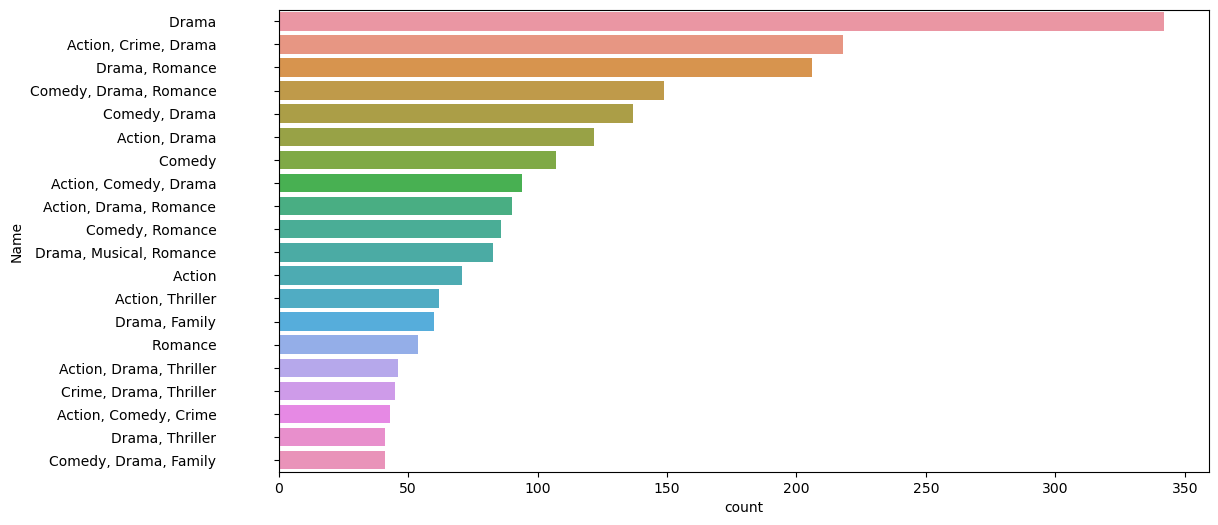

In [157]:
plt.figure(figsize=(12,6))
sns.countplot(data=df16,
             y="Name",
             order=df16["Name"].value_counts().index[0:20])


In [158]:
df17 = pd.read_sql_query('select Movie.title,Movie.year,M_Genre.GID,Genre.Name from Movie join M_Genre on Movie.MID = M_Genre.MID join Genre on M_Genre.GID = Genre.GID group by Genre.Name',cnx)
df17

,title,year,GID,Name
0,Action Jackson,I 2014,112,Action
1,Thugs of Hindostan,2018,15,"Action, Adventure"
2,Around the World in 80 Days,2004,36,"Action, Adventure, Comedy"
3,Detective Byomkesh Bakshy!,2015,80,"Action, Adventure, Crime"
4,Mohenjo Daro,2016,90,"Action, Adventure, Drama"
...,...,...,...,...
322,Love Games,2016,84,Thriller
323,Aitbaar,1985,301,"Thriller, Action"
324,Bichhoo,2000,276,"Thriller, Action, Crime"
325,Bees Saal Baad,1962,197,"Thriller, Musical, Mystery"


In [203]:
constraint2=df17['Name'].apply(lambda x: str(x).split(',')).tolist()
df_new2=pd.DataFrame(constraint2,index=df17['year'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Name'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,year,Name
0,I 2014,Action
1,2018,Action
2,2018,Adventure
3,2004,Action
4,2004,Adventure


In [204]:
df_new2['year'] = df_new2['year'].str.split(" ")

In [205]:
year = df_new2['year'].values

In [206]:
y = []
for i in year:
    if len(i) > 1:
        y.append(i[1])
    else:
        y.append(i[0])

In [207]:
df_new2['year'] = y

In [208]:
df_new2['year'].unique()

array(['2014', '2018', '2004', '2015', '2016', '1980', '1953', '2013',
       '2012', '1983', '2017', '2008', '2007', '2001', '1970', '2009',
       '2011', '1984', '1982', '1989', '1988', '1977', '1979', '1994',
       '1992', '1964', '1998', '2000', '1995', '1972', '1997', '1959',
       '1996', '1957', '2005', '2010', '1999', '2006', '1936', '1946',
       '1962', '2002', '1993', '1941', '1971', '2003', '1987', '1958',
       '1976', '1981', '1985', '1960', '1990', '1949', '1973', '1966',
       '1969', '1948', '1967', '1954', '1963'], dtype=object)

In [209]:
df_new2

,year,Name
0,2014,Action
1,2018,Action
2,2018,Adventure
3,2004,Action
4,2004,Adventure
...,...,...
868,1962,Thriller
869,1962,Musical
870,1962,Mystery
871,1967,Thriller


In [210]:
df_new2.isna().sum()

year    0
Name    0
dtype: int64

In [211]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    873 non-null    object
 1   Name    873 non-null    object
dtypes: object(2)
memory usage: 13.8+ KB


In [212]:
df_new2.nunique()

year    61
Name    65
dtype: int64

In [213]:
df_new2['Name'].str.strip()

0         Action
1         Action
2      Adventure
3         Action
4      Adventure
         ...    
868     Thriller
869      Musical
870      Mystery
871     Thriller
872      Mystery
Name: Name, Length: 873, dtype: object

In [214]:
df_new3 = df_new2[df_new2['Name'].isin(['Action','Drama','Crime','Romance','Comedy'])]
df_new3

,year,Name
1,2018,Action
3,2004,Action
6,2015,Action
9,2016,Action
12,1980,Action
...,...,...
847,1966,Romance
850,1963,Romance
853,1982,Romance
856,1964,Romance


<Axes: ylabel='year,Name'>

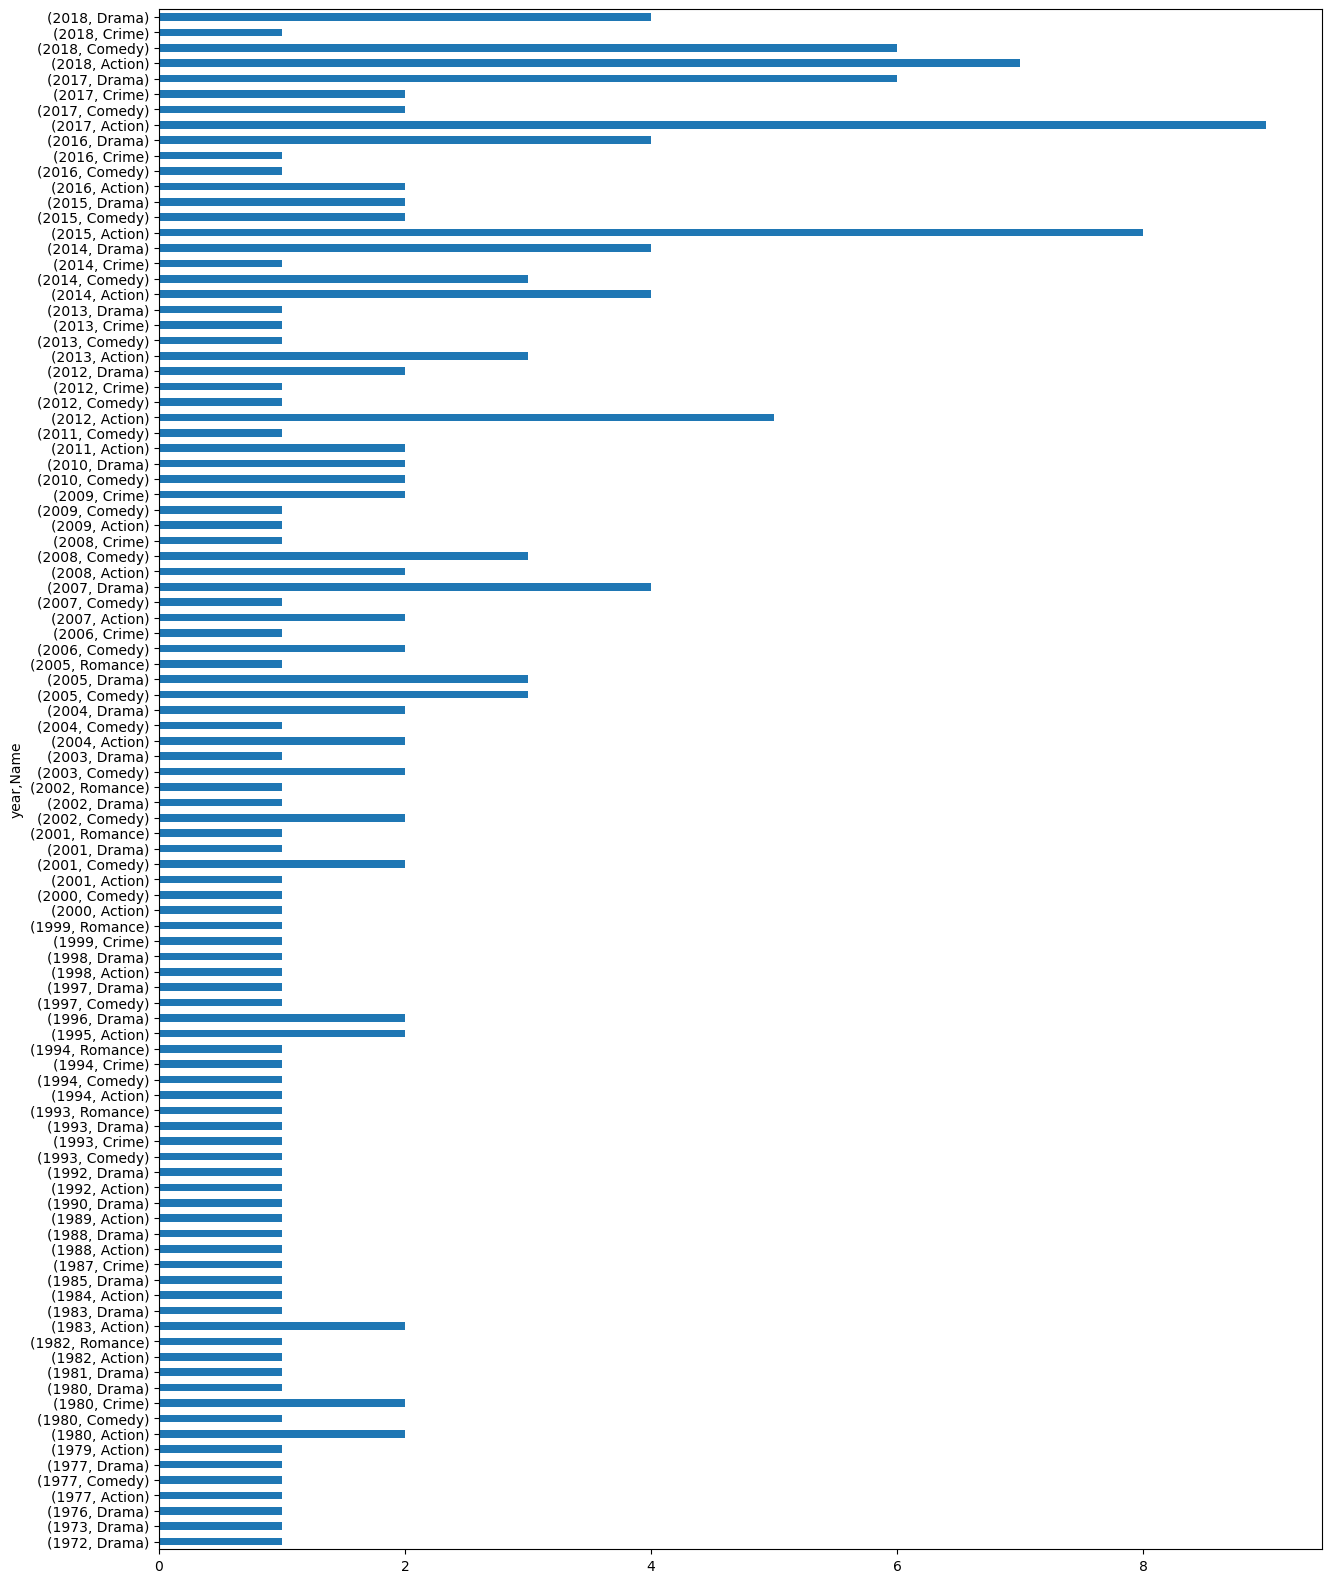

In [220]:
df_new3.groupby(['year','Name'])['year'].count()[20:].plot(kind='barh', figsize=(15, 20))

In [160]:
#Producer with most number of movies.

top_prod = pd.read_sql_query("SELECT DISTINCT p.Name Producer,COUNT(*) number_of_movies FROM Person p \
                          JOIN M_Producer d on TRIM(p.PID) = TRIM(d.PID) \
                          GROUP BY TRIM(d.PID) HAVING COUNT(*) >=10 ORDER BY number_of_movies DESC",cnx)
top_prod

,Producer,number_of_movies
0,Ronnie Screwvala,60
1,Aditya Chopra,54
2,Yogiraj Shetty,53
3,Mukesh Bhatt,53
4,Siddharth Roy Kapur,47
...,...,...
161,Dipa De Motwane,10
162,Shah Rukh Khan,10
163,Keshu Ramsay,10
164,Nasir Hussain,10


In [233]:
#Directors with most number of movies.

ans = pd.read_sql_query("SELECT DISTINCT p.Name Director,COUNT(*) number_of_movies FROM Person p \
                          JOIN M_Director d on TRIM(p.PID) = TRIM(d.PID) \
                          GROUP BY TRIM(d.PID) HAVING COUNT(*) >=10 ORDER BY number_of_movies DESC",cnx)
ans

,Director,number_of_movies
0,David Dhawan,39
1,Mahesh Bhatt,35
2,Ram Gopal Varma,30
3,Priyadarshan,30
4,Vikram Bhatt,29
5,Hrishikesh Mukherjee,27
6,Yash Chopra,21
7,Shakti Samanta,19
8,Basu Chatterjee,19
9,Subhash Ghai,18


In [235]:
#Movies with largest cast

larg_cst = pd.read_sql_query("SELECT m.title Movie_Name,count(distinct(c.PID)) Cast_Size FROM Movie m JOIN M_Cast c \
                            ON c.MID = m.MID GROUP BY m.MID ORDER BY Cast_Size desc",cnx)
larg_cst

,Movie_Name,Cast_Size
0,Ocean's Eight,238
1,Apaharan,233
2,Gold,215
3,My Name Is Khan,213
4,Captain America: Civil War,191
...,...,...
3468,Vaibhav Sethia: Don't,1
3469,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,1
3470,Subah Subah,1
3471,Return of Hanuman,1


In [236]:
#Decade with most number of movies

mst_num_mov = pd.read_sql_query("SELECT d.year Start, d.year+9 End, count(*) no_of_films FROM \
                            (SELECT DISTINCT year from Movie) d JOIN Movie m ON m.year >= Start and m.year<= End \
                            GROUP BY End ORDER BY no_of_films desc LIMIT 1",cnx)
mst_num_mov

,Start,End,no_of_films
0,2008,2017,1126


In [237]:
#List all the actors who acted in a film before 1970 and in a film after 1990.

actrs_cnt = pd.read_sql_query("SELECT name Actor FROM Person WHERE TRIM(PID) IN \
                          (SELECT TRIM(PID) FROM M_Cast WHERE MID IN \
                          (SELECT MID FROM Movie m WHERE m.year > 2000) \
                          AND PID IN (SELECT PID FROM M_Cast WHERE MID IN \
                          (SELECT MID FROM Movie n WHERE n.year < 1970)))",cnx)
actrs_cnt

,Actor
0,Rishi Kapoor
1,Amitabh Bachchan
2,Asrani
3,Zohra Sehgal
4,Parikshat Sahni
...,...
213,Miss Firoza
214,Dube
215,Dolly
216,Jamila Massey


In [238]:
#Actors that were never unemployed for more than 3 years at a stretch.

actrs_res = pd.read_sql_query("select Name as Actor from Person \
 where PID not in (select distinct(PID) from M_Cast as \
 c1 natural join Movie as m1 \
 where exists(select MID from M_Cast as c2 natural join Movie as m2 \
 where c1.PID=c2.PID and (m2.year-3)> m1.year \
 and not exists (select MID from M_Cast as c3 natural join Movie as m3 \
 where c1.PID=c3.PID and m1.year<m3.year and m3.year<m2.year)))",cnx)
actrs_res

,Actor
0,Christian Bale
1,Cate Blanchett
2,Benedict Cumberbatch
3,Naomie Harris
4,Andy Serkis
...,...
37561,Kamika Verma
37562,Dhorairaj Bhagavan
37563,Nasir Shaikh
37564,Kannan
